# Fractional Brownian Motion Parameter Estimation Using Variance Aggregation

Consider a time series of $n$, identically distributed samples,</br>

$
\begin{align}
X_1, X_2,X_3,\ldots,X_n
\end{align}
$

Divide the series into $d$ smaller series of length $m$ where $md=n$.\ and let,</br>
$k = 0,1,2,3,\ldots,d-1$ and define the aggregated sum by,

$
\begin{align}
X_k^m &= \frac{1}{m}\left( X_{km+1} + X_{km+2} + \cdots + X_{km+m-1} + X_{km+m} \right) \\
&= \frac{1}{m} \left( X_{km+1} + \cdots + X_{(k+1)m} \right) \\
&= \frac{1}{m} \sum_{i=km+1}^{(k+1)m} X_i
\end{align}
$

The aggregated mean is given by,

$
\begin{align}
\text{E}[X^m] &= \frac{1}{d}\sum_{i=1}^d X_i^m \\
&= \frac{1}{dm} \sum_{i=1}^d \sum_{j=im+1}^{(k+1)i} X_j \\
&= \frac{1}{n} \sum_{i=1}^n X_i
\end{align}
$

and the aggregated variance by,

$
\begin{align}
\text{Var}[X^m] = \frac{1}{d} \sum_{i=1}^d\left( X^m_i - \text{E}[X^m] \right)^2
\end{align}
$

This method makes use of the self similarity of fractional brownian motion. Consider the aggregated process,

$
\begin{align}
X_0^m = \frac{1}{m} \sum_{i=1}^m X_i
\end{align}
$

From self similarity of fractional brownian motion,

$
\begin{align}
X_{ai} \sim a^H X_i
\end{align}
$

Since the distribution of the sum of Gaussian random variables is the distribution of the last it follows that,</br> 

$
\begin{align}
X_0^m \sim \frac{1}{m} X_m \sim \frac{m^H}{m} X_1 = m^{H-1} X_1
\end{align}
$

For fractional brownian noise,

$
\begin{align}
&\text{E}[\Delta Z^H_t] = 0 \\
&\text{Var}[\Delta Z^H_t] = \Delta t^{2H}
\end{align}
$

$X_1$ is a single increment of brownian motion it follows that,

$
\begin{align}
\text{Var}[X_1] = \Delta t^{2H} = \sigma^2
\end{align}
$

so,

$
\begin{align}
\text{Var}[X_0^m] = \text{Var}[m^{H-1} X_1] = m^{2(H-1)}\text{Var}[X_1] = \sigma^2 m^{2(H-1)}
\end{align}
$

From stationarity of it follows that,

$
\begin{align}
\text{Var}[X_k^m] = \sigma^2 m^{2(H-1)}
\end{align}
$

It follows that $H$ can be determined by using OLS on $\text{Var}[X_k^m]$ as a function of $m$.

## Imports

In [1]:
%reload_ext autoreload
%autoreload 2

# import system modules and set local import path
import os
import sys
import numpy
from matplotlib import pyplot

sys.path.insert(0, os.path.abspath('../..'))

# import local modules
from lib import fbm
from lib import bm
from lib import plots
from lib import config
from lib import stats
from lib.plot_config import (PlotDataType, RegressionPlotType)
from lib.stats import RegressionType

# Config Plot Style
pyplot.style.use(config.glyfish_style)

/Users/troy/.pyenv/versions/gly.fish.3.9.2/lib/python3.9/site-packages/pandas/compat/__init__.py:109: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## Helpers

In [2]:
Δt = 1.0
npts = 2**10
nagg = 100
m = [1, 10, 50]

## Simulation $H=0.8$

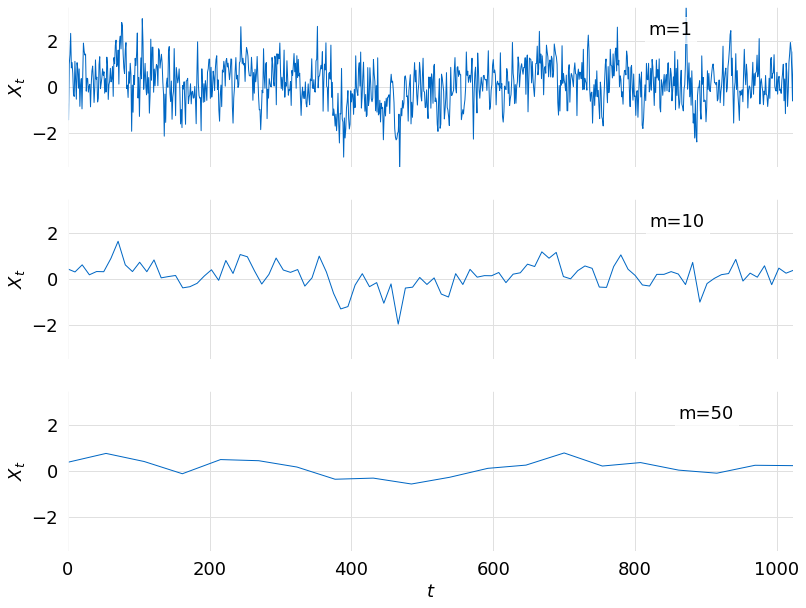

In [3]:
H = 0.8

title = f"Aggregated Fractional Brownian Noise: Δt={Δt}, H={H}"
labels = [f"m={m[0]}", f"m={m[1]}", f"m={m[2]}"]

samples = fbm.fft_noise(H, npts, Δt)
series = fbm.agg_series(samples, m)
time = fbm.agg_time(samples, m)

plots.stack(series, [-3.5, 3.5], x=time, title=title, labels=labels)

In [4]:
m_vals = plots.logspace(nagg, npts)
agg_var = fbm.agg_var(samples, m_vals)
results = stats.OLS(agg_var, m_vals, RegressionType.LOG)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     1729.
Date:                Fri, 25 Mar 2022   Prob (F-statistic):           4.59e-64
Time:                        20:13:55   Log-Likelihood:                 201.32
No. Observations:                 100   AIC:                            -398.6
Df Residuals:                      98   BIC:                            -393.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0349      0.017     -2.051      0.043      -0.069      -0.001
x1            -0.4608      0.011    -41.581      0.000      -0.483      -0.439
==============================================================================
Omnibus:                        3.660   Durbin-Watson:                   1.177
Prob(Omnibus):                  0.160   Jarque-Bera (JB):                3.041
Skew:                          -0.403   Prob(JB):                        0.219
Kurtosis:                       3.281   Cond. No.                         11.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

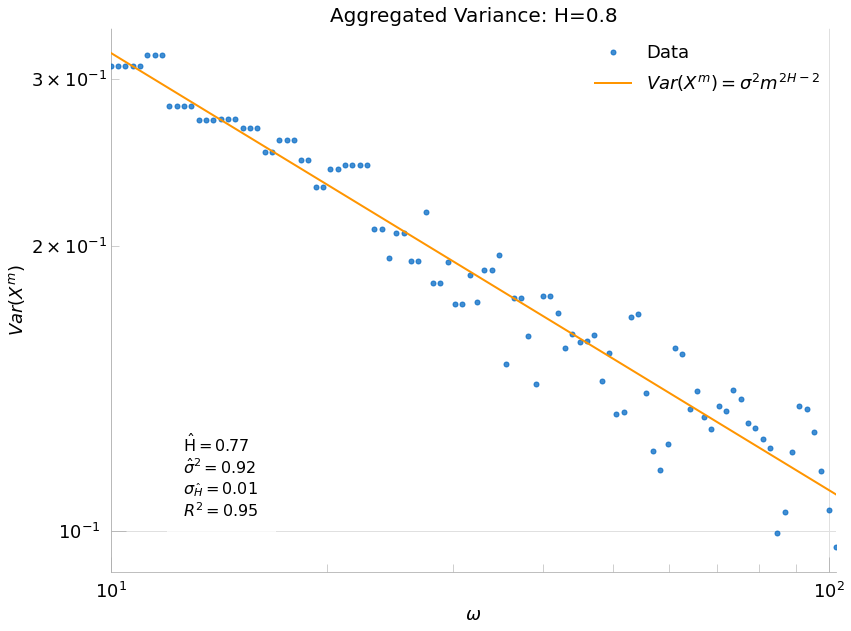

In [5]:
title = title = f"Aggregated Variance: H={H}"
plots.regression(agg_var, m_vals, results, title=title, type=RegressionPlotType.FBM_AGG_VAR)

## Simulation $H=0.6$

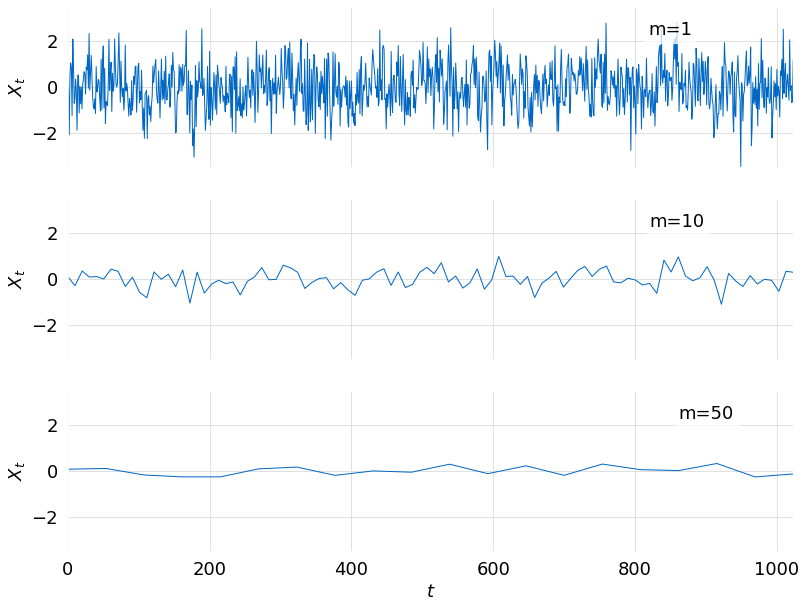

In [6]:
H = 0.6

title = f"Aggregated Fractional Brownian Noise: Δt={Δt}, H={H}"
labels = [f"m={m[0]}", f"m={m[1]}", f"m={m[2]}"]

samples = fbm.fft_noise(H, npts, Δt)
series = fbm.agg_series(samples, m)
time = fbm.agg_time(samples, m)

plots.stack(series, [-3.5, 3.5], x=time, title=title, labels=labels)

In [7]:
m_vals = plots.logspace(nagg, npts)
agg_var = fbm.agg_var(samples, m_vals)
results = stats.OLS(agg_var, m_vals, RegressionType.LOG)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     1706.
Date:                Fri, 25 Mar 2022   Prob (F-statistic):           8.54e-64
Time:                        20:13:56   Log-Likelihood:                 123.69
No. Observations:                 100   AIC:                            -243.4
Df Residuals:                      98   BIC:                            -238.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2367      0.037      6.409      0.000       0.163       0.310
x1            -0.9949      0.024    -41.304      0.000      -1.043      -0.947
==============================================================================
Omnibus:                       14.345   Durbin-Watson:                   1.411
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               26.433
Skew:                          -0.552   Prob(JB):                     1.82e-06
Kurtosis:                       5.264   Cond. No.                         11.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

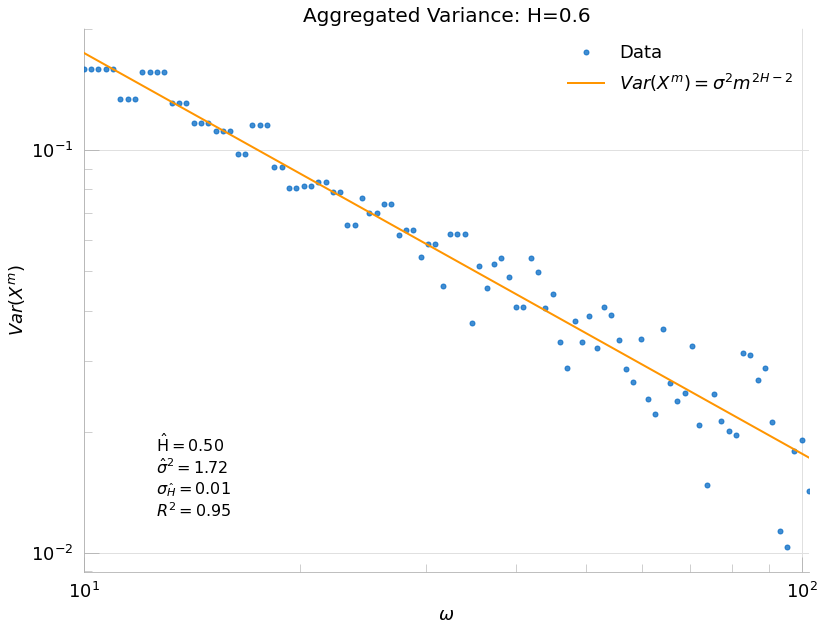

In [8]:
title = title = f"Aggregated Variance: H={H}"
plots.regression(agg_var, m_vals, results, title=title, type=RegressionPlotType.FBM_AGG_VAR)

## Simulation $H=0.4$

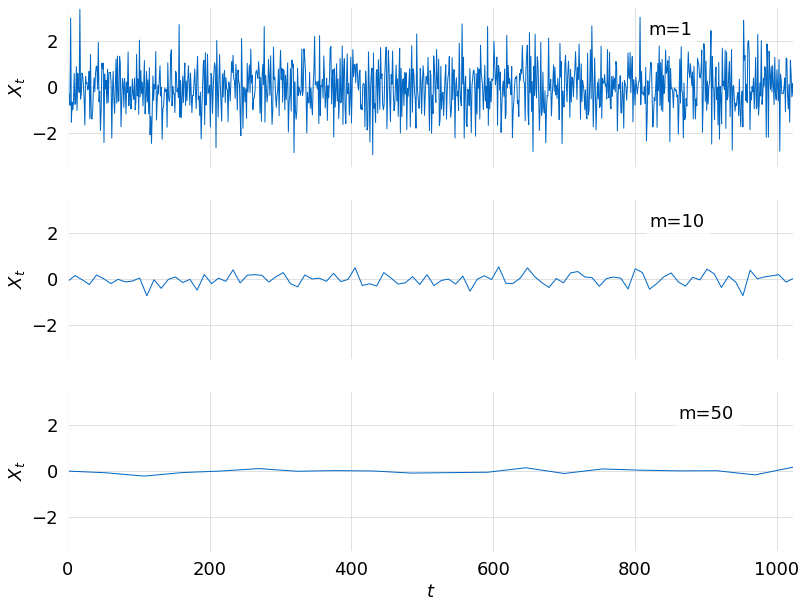

In [9]:
H = 0.4

title = f"Aggregated Fractional Brownian Noise: Δt={Δt}, H={H}"
labels = [f"m={m[0]}", f"m={m[1]}", f"m={m[2]}"]

samples = fbm.fft_noise(H, npts, Δt)
series = fbm.agg_series(samples, m)
time = fbm.agg_time(samples, m)

plots.stack(series, [-3.5, 3.5], x=time, title=title, labels=labels)

In [10]:
m_vals = plots.logspace(nagg, npts)
agg_var = fbm.agg_var(samples, m_vals)
results = stats.OLS(agg_var, m_vals, RegressionType.LOG)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     1288.
Date:                Fri, 25 Mar 2022   Prob (F-statistic):           3.47e-58
Time:                        20:13:56   Log-Likelihood:                 83.400
No. Observations:                 100   AIC:                            -162.8
Df Residuals:                      98   BIC:                            -157.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1082      0.055      1.958      0.053      -0.001       0.218
x1            -1.2934      0.036    -35.892      0.000      -1.365      -1.222
==============================================================================
Omnibus:                        1.747   Durbin-Watson:                   1.354
Prob(Omnibus):                  0.418   Jarque-Bera (JB):                1.273
Skew:                           0.021   Prob(JB):                        0.529
Kurtosis:                       3.551   Cond. No.                         11.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

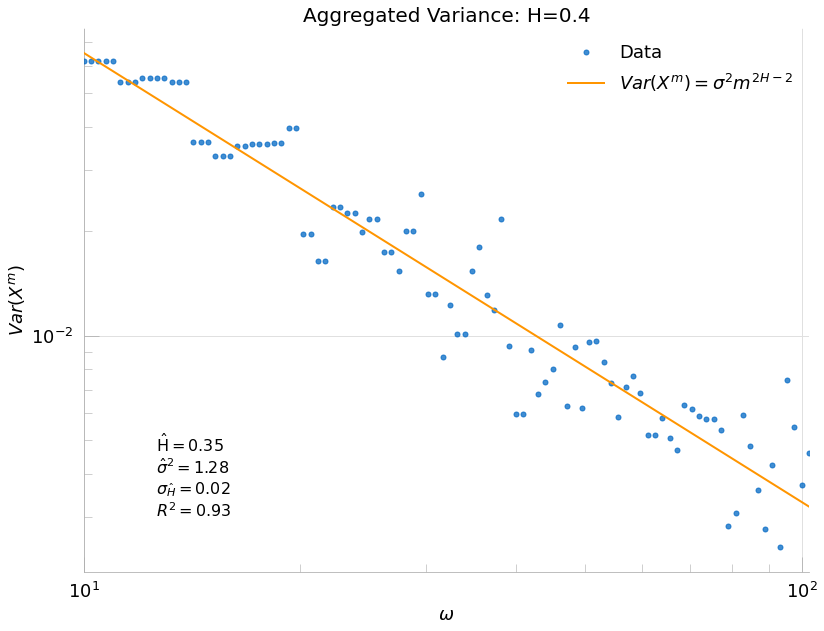

In [11]:
title = title = f"Aggregated Variance: H={H}"
plots.regression(agg_var, m_vals, results, title=title, type=RegressionPlotType.FBM_AGG_VAR)

## Simulation $H=0.2$

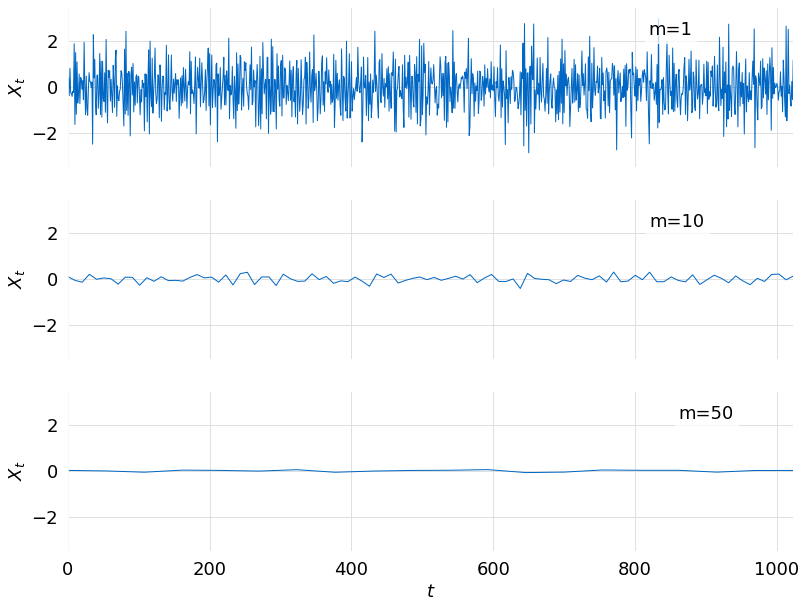

In [12]:
H = 0.2

title = f"Aggregated Fractional Brownian Noise: Δt={Δt}, H={H}"
labels = [f"m={m[0]}", f"m={m[1]}", f"m={m[2]}"]

samples = fbm.fft_noise(H, npts, Δt)
series = fbm.agg_series(samples, m)
time = fbm.agg_time(samples, m)

plots.stack(series, [-3.5, 3.5], x=time, title=title, labels=labels)

In [13]:
m_vals = plots.logspace(nagg, npts)
agg_var = fbm.agg_var(samples, m_vals)
results = stats.OLS(agg_var, m_vals, RegressionType.LOG)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     1354.
Date:                Fri, 25 Mar 2022   Prob (F-statistic):           3.57e-59
Time:                        20:13:56   Log-Likelihood:                 76.612
No. Observations:                 100   AIC:                            -149.2
Df Residuals:                      98   BIC:                            -144.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2687      0.059     -4.542      0.000      -0.386      -0.151
x1            -1.4192      0.039    -36.798      0.000      -1.496      -1.343
==============================================================================
Omnibus:                        0.057   Durbin-Watson:                   1.258
Prob(Omnibus):                  0.972   Jarque-Bera (JB):                0.193
Skew:                           0.042   Prob(JB):                        0.908
Kurtosis:                       2.802   Cond. No.                         11.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

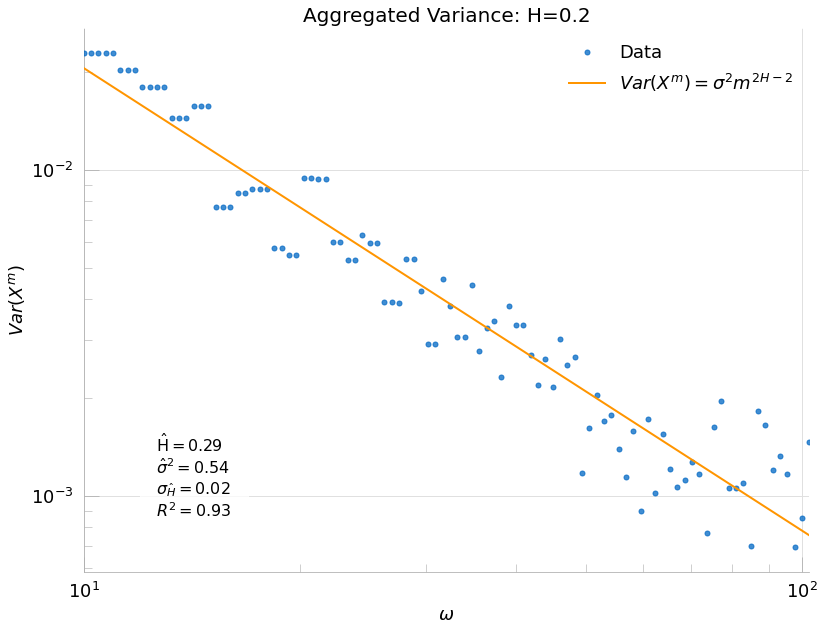

In [14]:
title = title = f"Aggregated Variance: H={H}"
plots.regression(agg_var, m_vals, results, title=title, type=RegressionPlotType.FBM_AGG_VAR)